**INTRODUCTION**

ASSESSING THE ACCURACY OF FETAL HEALTH PREDICTIONS FROM CARDIOTOCOGRAM DATA 

Reducing infant mortality through early detection and maternal health assessment remains a priority for many countries around the world. According to the World Bank and the Centers for Disease Control and Prevention, early neonatal and infant mortality has been declining in the past three decades because of significant advances in health care and computer health analytics. Additionally, Chen et. al states that the increased use of fetal heart rate monitoring through cardiotograms is the leading cause of this trend due to its ability to predict fetal health (Chen et. al, 2011). 

Cardiotocograms (CTGs) have aided in the reduction of child infant mortality because of their widespread accessibility and relative affordability (Daly et. al, 2011). CTG's measure a variety of fetal health indicators which lend insight into the general health of a fetus. These measurements include fetal movement metrics, heart rate and variability, uterine contractions and several other variables. According to the Daly et. al study examining Cardiotocography as a predictor of fetal outcome in women, CTG’s are a reliable screening indicator of fetal well-being when paired with an appropriate diagnosis from a gynecologist (Daly et. al, 2011). In light of this, the question arises if it is possible to predict the health of a fetus based solely on the CTG fetal health indicator observations.

So, can we predict fetal health Normal, Suspected or Pathological using a classification model with baseline fetal heartbeat, Fetal Movement, uterine contractions and the mean value of short term variability.

Using a 2010 dataset donated by the Biomedical Engineering Institute in Porto Portugal, an exploratory data analysis will be done and a classification model will be built. This model will aim to predict fetal health and test the feasibility and accuracy of reproducing a gynecologist’s diagnosis. This data set contains 2126 fetal CTG's that were processed by three obstetricians who assigned a classification label to each reading as either Normal, Suspected, or Pathological. Using the CTG values for baseline fetal heartbeat, fetal movement, uterine contractions and a mean value of short-term variability, our project seeks to assess if these indicators can predict fetal health (Normal, Suspected, Pathological) using a classification model.

Our report seeks to quantify the viability and accuracy of CTG data in predicting fetal health without input from a gynecologist. According to a study done by Heintz et. al, the ability of a mother to afford the costs of fetal health care remains a key indicator of fetal health and birth success rates (Heintz, 2008). Seeing a gynecologist in person for a diagnosis represents one of the factors for the high cost of fetal health care and thus the ability for fetal health to be predicted from CTG reading indicators alone may make healthcare more accessible for all, effectively reducing fetal mortality rates (Chen et. al, 2011 & Heintz, 2008). Our analysis of this data set will lend insight into the feasibility and practicality of implementing a model to predict fetal health solely on CTG variable indicators. 


In our project, we will be using fetal health dataset, which contains following variables below:

- Baseline: Baseline value
- Accelerations: Accelerations
- fm: Fetal movement
- uc: Uterine contractions
- ldec: Light decelerations
- sdec: Severe decelerations
- prolong: Prolongued decelerations
- asv: Abnormal short-term variability
- msv: Mean value of short-term variability
- mlv: Mean value of long-term variability
- plv: Percentage of time with abnormal long-term variability
- hist_min: Minimum value of histogram
- hist_max: Maximum value of histogram
- hist_num_peaks: Number of histogram peaks
- hist_num_zeros: Number of histogram zeros
- hist_mode: Histogram mode
- hist_mean: Histogram mean
- hist_width: Histogram width
- hist_median: Histogram median
- hist_var: Histogram variance
- hist_tendency: Histogram tendency
- fetal_health: Fetal health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)

**Loading the Necessary Libraries:**

In [2]:
#load libraries 
install.packages("rlang")
install.packages("tidymodels")
install.packages("GGally")
install.packages("kknn")
library(rlang)
library(tidyverse)
library(repr)
library(rvest)
library(readxl)
#library(cowplot)
library(readr)
library(tidymodels)
library(dplyr)
#library(fastDummies)
library(GGally)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%@%()         masks rlang::%@%()
✖ dplyr::filter()      masks stats::filter()
✖ purrr::flatten()     masks rlang::flatten()
✖ purrr::flatten

**Importing and Reading Data from the web:**

By using `read_csv` to load `urlfile` and then using `head` to display the first 10 rows of the data.
This will display a tibble of the first 10 rows of the fetal_health dataset, rather than the whole dataset.

In [5]:
#import the data set from the web



urlfile = "https://raw.githubusercontent.com/woaixuexi1016/DSCI_project1/main/fetal_health.csv"
fetal_health <- read_csv(url(urlfile))


fetal_health_renamed <- fetal_health |>
  rename(Baseline = 'baseline value',
         Accelerations = 'accelerations',
         fm = 'fetal_movement',
         uc = 'uterine_contractions',
         ldec = 'light_decelerations',
         sdec = 'severe_decelerations',
         prolong = 'prolongued_decelerations',
         asv = 'abnormal_short_term_variability',
         msv = 'mean_value_of_short_term_variability',
         mlv = 'mean_value_of_long_term_variability',
         plv = 'percentage_of_time_with_abnormal_long_term_variability',
         hist_min = 'histogram_min',
         hist_max = 'histogram_max',
         hist_num_peaks = 'histogram_number_of_peaks',
         hist_num_zeros = 'histogram_number_of_zeroes',
         hist_width = 'histogram_width',
         hist_mode = 'histogram_mode',
         hist_mean = 'histogram_mean',
         hist_median = 'histogram_median',
         hist_var = 'histogram_variance',
         hist_tendency = 'histogram_tendency',
         fetal_health = 'fetal_health')



as_tibble(head(fetal_health_renamed, n = 10))

Rows: 2126 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): baseline value, accelerations, fetal_movement, uterine_contraction...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Baseline,Accelerations,fm,uc,ldec,sdec,prolong,asv,msv,plv,⋯,hist_min,hist_max,hist_num_peaks,hist_num_zeros,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
120,0.000,0,0.000,0.000,0,0.000,73,0.5,43,⋯,62,126,2,0,120,137,121,73,1,2
132,0.006,0,0.006,0.003,0,0.000,17,2.1,0,⋯,68,198,6,1,141,136,140,12,0,1
133,0.003,0,0.008,0.003,0,0.000,16,2.1,0,⋯,68,198,5,1,141,135,138,13,0,1
134,0.003,0,0.008,0.003,0,0.000,16,2.4,0,⋯,53,170,11,0,137,134,137,13,1,1
132,0.007,0,0.008,0.000,0,0.000,16,2.4,0,⋯,53,170,9,0,137,136,138,11,1,1
134,0.001,0,0.010,0.009,0,0.002,26,5.9,0,⋯,50,200,5,3,76,107,107,170,0,3
134,0.001,0,0.013,0.008,0,0.003,29,6.3,0,⋯,50,200,6,3,71,107,106,215,0,3
122,0.000,0,0.000,0.000,0,0.000,83,0.5,6,⋯,62,130,0,0,122,122,123,3,1,3
122,0.000,0,0.002,0.000,0,0.000,84,0.5,5,⋯,62,130,0,0,122,122,123,3,1,3


Table 1: Renaming Variables in Fetal Health Dataset

**METHODS:**

In this study, we aim to build a classification model to predict fetal health as Normal, Suspected or Pathogenetic based on three variables: Baseline Fetal Heart Beat (`Baseline`), Abnormal Short Term Variability (`asv`) and Percentage of time with abnormal long-term variability (`plv`). To accurately compare the variables, they must be scaled.

The dataset is then divided into a training dataset comprising 75% of the data and a test dataset comprising the remaining 25%. The training dataset is used to build and train our model, while the test dataset is used to assess the accuracy of our model.

To build our classification model, we use the k-nearest neighbors function with a rectangular weight function and a tunable number of neighbors. The engine is set to "kknn" (k-NN), and the mode is set to "classification".

We use the fit function to train our model, passing the k-nearest neighbors specifications with the fetal health variable as the target and with the Baseline Fetal Heart Beat (Baseline), Abnormal Short Term Variability (asv) and Percentage of time with abnormal long-term variability (plv) as our predictors. 

Next, the training dataset is divided into 10 cross-validation folds, with the target variable (fetal_health) as the stratification variable.  After drawing a cross-validation plot, we could select the most accurate K nearest neighbor value for our model.
 
Subsequently, our best k-NN model specification is created, and a new workflow is created, which adds the recipe and best model specification. The model is then fitted on the training data to make predictions on the test data (fetal_health_test).

Lastly, we try to evaluate the accuracy and confusion matrix for the k-Nearest Neighbors classification model.  If the accuracy is high, our model is effective at predicting fetal health. If the accuracy is low, we may need to revise our variables and repeat the process.



**Exploring the Data:**

We set the seed to 123 using the `set.seed` function. This ensures that the random numbers generated by R will be the same every time the code is run, making the analysis reproducible.


In [6]:
# Set seed for reproducibility
set.seed(123)

**Prepare the data for analysis:**

*Cleaning and Wrangling data:*

After previewing the dataset, our first step is to transpose the data by using `t()` to swap the rows and columns. This is done to make the data set tidy and easier to work with. By transposing the data, this dataset is in a tidy format, as each observation is in a separate row and each variable is in a separate column, which makes it easier to perform analysis on the data. Then missing values were checked using the `is.na()` function in the `fetal_health_renamed` data frame, we can identify any areas where there is missing information and determine how best to deal with it in the analysis.

Some columns of the `fetal_health_renamed` data frame that contain histogram data are removed because they are not relevant for the analysis. The `select()` function is used to select only the columns that are needed for the analysis. This is done to reduce the number of variables in the data set to only those that are relevant for the analysis, which can improve the accuracy and interpretability of the results.

In addition to the steps above, we also performed some additional data cleaning and wrangling steps. Firstly, we renamed the first column of the `selected_fetal_health` data frame using the `colnames()` function. Next, we converted the `fetal_health` variable from a character or numeric type to a factor using the `as.factor()` function. This is important because fetal_health is a categorical variable that will be used as the outcome variable in the analysis.

Finally, we used the `initial_split()` function to split the `factored_fetal_health` data frame into a training set and a testing set. The training set contains 75% of the data and is used to fit the model, while the testing set contains the remaining 25% of the data and is used to evaluate the performance of the model.


In [7]:
#cleaning and wrangling data
fetal_health_t <- t(fetal_health_renamed)   

#checking missing data
print("The number of missing data is:") 
sum(is.na(fetal_health_renamed))

#select for data columns we might need (except for histogram columns)
selected_fetal_health <- select(fetal_health_renamed, -"hist_min", -"hist_max", -"hist_num_peaks", -"hist_num_zeros",  -"hist_mode", -"hist_mean", -"hist_median", -"hist_var", -"hist_tendency", -"hist_width")


#we will be treating fetal_health as a categorcal variable, therefore fetal_health has to be a factor. Re-name fetal_health
factored_fetal_health <- selected_fetal_health|> 
    mutate(fetal_health = as_factor(fetal_health))

#splitting the data into testing data and training data 
fetal_health_split <- initial_split(factored_fetal_health, prop = 0.75, strata = fetal_health)
fetal_health_train <- training(fetal_health_split)
fetal_health_test <- testing(fetal_health_split)
head(fetal_health_train)

[1] "The number of missing data is:"


[1] 0

Baseline,Accelerations,fm,uc,ldec,sdec,prolong,asv,msv,plv,mlv,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
132,0.006,0,0.006,0.003,0,0.000,17,2.1,0,10.4,1
133,0.003,0,0.008,0.003,0,0.000,16,2.1,0,13.4,1
132,0.007,0,0.008,0.000,0,0.000,16,2.4,0,19.9,1
134,0.001,0,0.010,0.009,0,0.002,26,5.9,0,0.0,3
134,0.001,0,0.013,0.008,0,0.003,29,6.3,0,0.0,3
122,0.000,0,0.003,0.000,0,0.000,86,0.3,6,10.6,3


Table 2: Training Data Splitted by Fetal Health Dataset 

**DATA VISUALIZATION:**

Now that we have our data in a tidy format, we first gather all the variable in `factored_fetal_health` data frame by using `gather` function. Then these data are used to creat box plots comparing the values of each variable across different fetal health statuses and the `facet_wrap` function is used to create separate box plots for each variable.

Then the following combined boxplot show the distribution of relevant variable we are using in our classification model, plotted against the fetal health score (1,2,3). This helps us gauge how the CTG data may help us predict fetal health. 


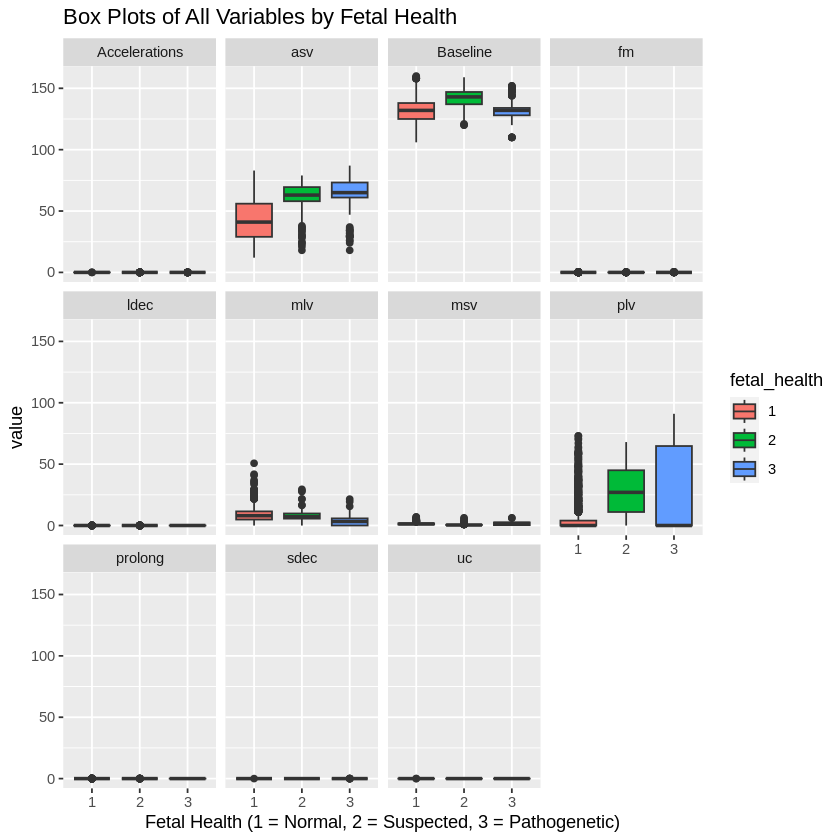

In [8]:

# Gather all variables into a "long" format
fetal_health_long <- factored_fetal_health |> gather(variable, value, -fetal_health)

# Create box plots to compare the variables
ggplot(fetal_health_long, aes(x = fetal_health, y = value, fill = fetal_health)) + 
  geom_boxplot() + 
  facet_wrap(~ variable) +
  ggtitle("Box Plots of All Variables by Fetal Health") +
  xlab("Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)")






Figure 1: A Box Plots of All Variables by Fetal Health in Fetal Health Dataset

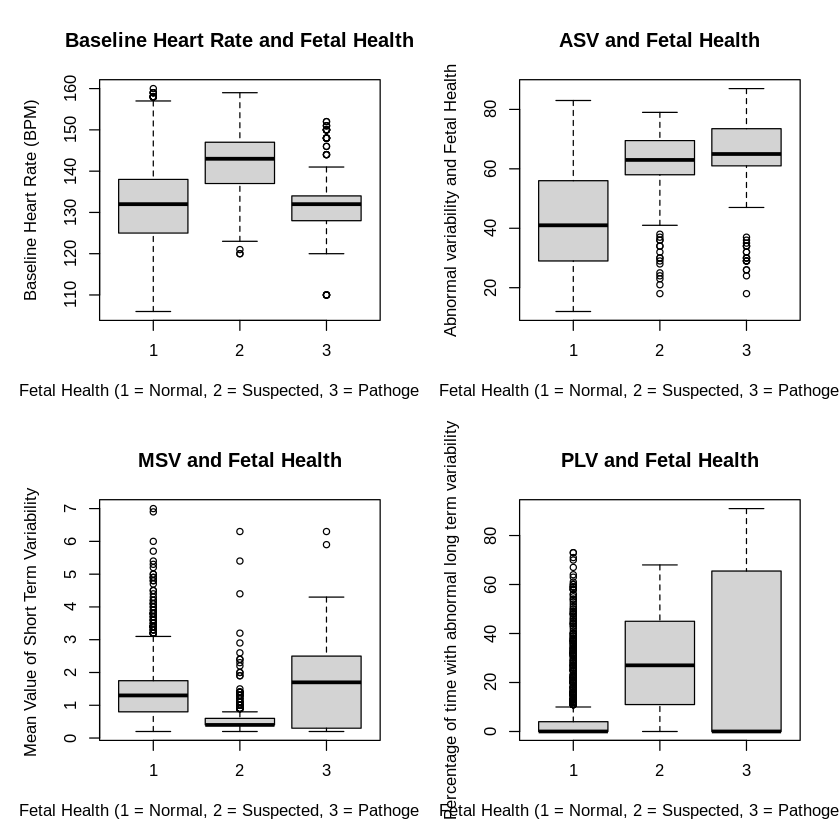

In [9]:
# Create box plots to compare relevant variables

par(mfrow = c(2,2))
par(mar = c(5, 5, 4, 2))

boxplot(Baseline~fetal_health,data = factored_fetal_health, main = "Baseline Heart Rate and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Baseline Heart Rate (BPM)")
 

boxplot(asv~fetal_health,data = factored_fetal_health, main = "ASV and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Abnormal variability and Fetal Health")


boxplot(msv~fetal_health,data = factored_fetal_health, main = "MSV and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Mean Value of Short Term Variability ")


boxplot(plv~fetal_health,data = factored_fetal_health, main = "PLV and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Percentage of time with abnormal long term variability")



Figure 2: A Box Plots of Relevant Variables by Fetal Health in Fetal Health Dataset

**Determine the Predictor(s) and the Explanatory Variable(s):**

After previewing the box plots, I notice the variables *(Baseline, msv, mlv and plv)* have the relatively greatest variation across the different fetal health categories. As we known variables with high variation across categories may have a stronger correlation to fetal health and would be good candidates for classification.


To choose variables we wish to use as predictors, we compared the four variables to fetal health using a `ggpair` function. The  matrix revealed that `asv` had a strong and positive correlation coefficient with all three fetal health statuses, which was slightly larger than the correlation coefficient between `msv` and `fetal_health`. Since both of these variables were similar for our research, we chose to focus on the relationship between the highest correlation coefficient, which was with `asv`. 

We also observed similar patterns in the relationship between `plv` and `fetal_health`, making it a relevant predictor. Additionally, we selected `baseline` as a predictor due to its relatively high correlation coefficient with the other predictors. In total, we chose three predictors to be the best at classifying data points for fetal health categories: *abnormal_short_term_variability (`asv`), Baseline_value (`baseline`), and percentage_of_time_with_abnormal_long_term_variability (`plv`)*.



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


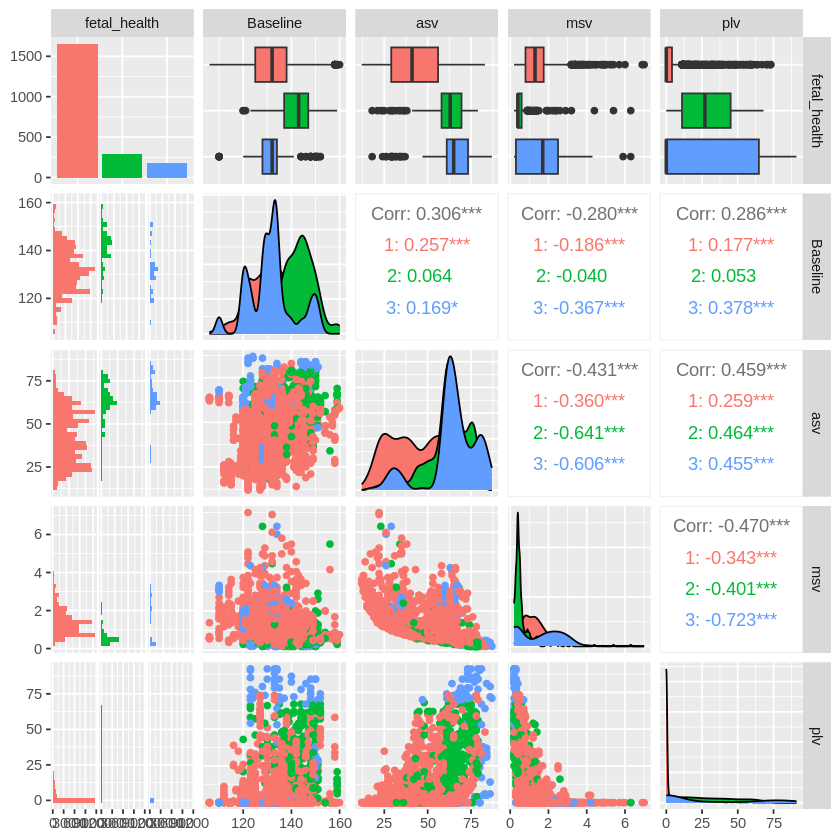

In [10]:
# Generate scatterplot matrix
selected_vars <- factored_fetal_health[, c( "fetal_health", "Baseline", "asv", "msv", "plv")]
ggpairs(selected_vars, aes(color = fetal_health))

Figure 3: A Scatterplot Matrix with Relevant Variables in Fetal Health Dataset

**K-NEAREST NEIGHBOUR CLASSIFICATION:**

1) A recipe was developed to specify the target and predictor variables, along with the essential preprocessing steps for all the variables. The recipe was constructed to ensure that the training data was appropriately and accurately processed, with the training data being passed as the data argument of the recipe.

2) A nearest_neighbors model specification was subsequently created with the parameter for the number of neighbors set at 5, as per the methodology previously established. This ensured that the model had optimal accuracy and predictive power.

3) In order to achieve optimal performance and prevent overfitting, the vfold_cv() function was utilized to split up the training set for cross-validation, thus ensuring the model was robust and reliable.

4) The model specification and recipe were integrated into the workflow() function to enable the estimation of the classifier accuracy across a range of K values, ensuring that the classifier accuracy was thoroughly evaluated and the model was optimally tuned.

5) A value of K was then selected, ensuring that the accuracy estimate was at its highest and was not significantly affected by any nearby values. This meticulous and detailed selection of K ensured the model had the optimal level of accuracy and was reliable in its predictions.

6) Based on the best parameter value, a new model specification was generated, with the goal of refining and improving the classification model even further. The classifier was then re-trained using the fit() function, ensuring that the accuracy and reliability of the model were significantly enhanced.

7) Finally, the estimated accuracy of the classifier on the test set was meticulously evaluated using the predict function. This ensured that the model was not only highly accurate but also reliable and robust, making it suitable for future predictions and applications.

In [11]:
#(1)#
fetal_health_recipe <- recipe(fetal_health ~ Baseline + asv + plv, data = fetal_health_train) |>
         step_scale(all_predictors()) |>
         step_center(all_predictors())

#(2)#
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

#(3)#
fetal_health_vfold <- vfold_cv(fetal_health_train, v = 10, strata = fetal_health)

gridvals <- tibble(neighbors = seq( 1,15)) 


#(4)#
fetal_health_results <- workflow() |>
  add_recipe(fetal_health_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = fetal_health_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")


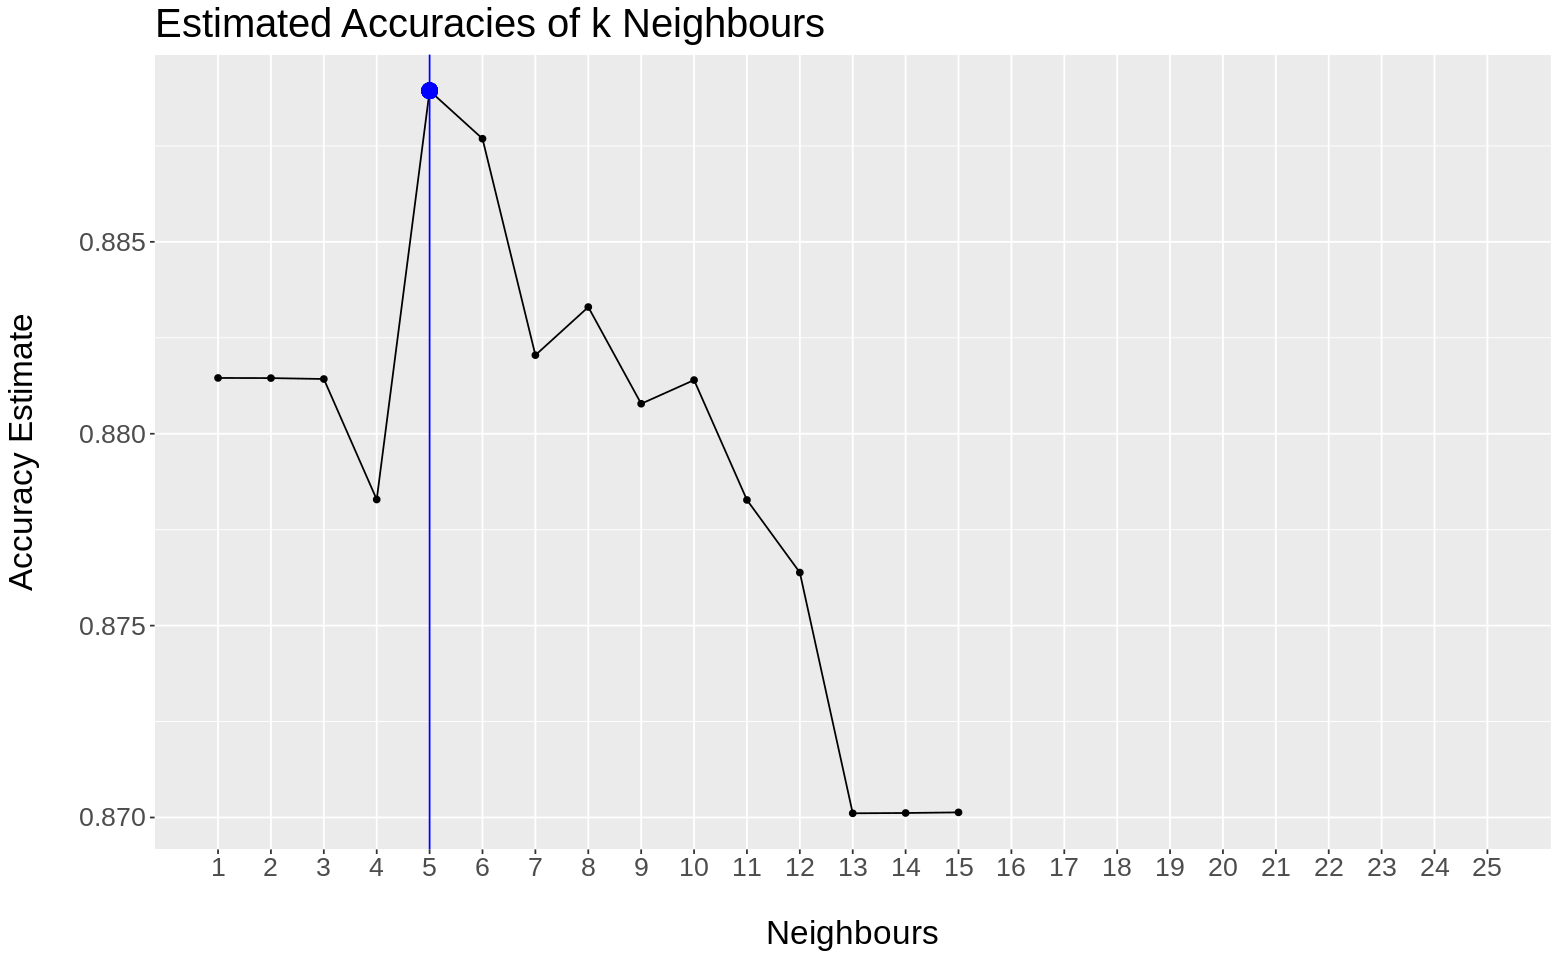

In [12]:
options(repr.plot.width = 13, repr.plot.height = 8)

#(5)#
ky <- fetal_health_results |>
    filter(neighbors == 5) |>
    select(mean) |>
    pull()

cross_val_plot <- fetal_health_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 5, colour = "blue") +
    geom_point(aes(x = 5, y = ky), size = 4, colour = "blue") +
    labs(x = "\nNeighbours",
         y = "Accuracy Estimate\n",
         title = "Estimated Accuracies of k Neighbours") +
    scale_x_continuous(limits = c(1, 25),
                       breaks = seq(1, 25),
                       minor_breaks = seq(1, 25, 1)) +
    theme(text = element_text(size = 20),
          plot.caption = element_text(size = 20, hjust = 0))

cross_val_plot

In [13]:
#(6)#
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

fetal_health_fit <- workflow() |>
  add_recipe(fetal_health_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = fetal_health_train)

#(7)#
# Get the prediction column
fetal_health_predictions <- predict(fetal_health_fit, fetal_health_test) |> 
    bind_cols(fetal_health_test)

fetal_health_predictions


.pred_class,Baseline,Accelerations,fm,uc,ldec,sdec,prolong,asv,msv,plv,mlv,fetal_health
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,120,0.000,0.000,0.000,0.000,0,0.000,73,0.5,43,2.4,2
1,134,0.003,0.000,0.008,0.003,0,0.000,16,2.4,0,23.0,1
3,122,0.000,0.000,0.000,0.000,0,0.000,83,0.5,6,15.6,3
2,151,0.000,0.000,0.001,0.001,0,0.000,64,1.9,9,27.6,2
1,130,0.006,0.441,0.005,0.005,0,0.000,24,2.1,0,10.9,1
1,130,0.005,0.469,0.005,0.004,0,0.001,29,1.7,0,7.8,1
1,128,0.000,0.000,0.000,0.000,0,0.000,80,0.5,0,6.8,3
1,124,0.000,0.000,0.000,0.000,0,0.000,86,0.4,14,4.8,3
1,132,0.000,0.112,0.004,0.014,0,0.000,22,6.9,0,6.3,1


Now we compare the accuracy of the predictions to the true values in the test set

In [14]:
fetal_health_acc <- fetal_health_predictions |>
         metrics(truth = fetal_health, estimate = .pred_class) |>
         select(.metric, .estimate) |> 
         head(1)

fetal_health_acc

.metric,.estimate
<chr>,<dbl>
accuracy,0.9041353


Below we compare the predictions to the true values in a confusion matrix

In [15]:
fetal_health_cm <- fetal_health_predictions |>
        conf_mat(truth = fetal_health, estimate = .pred_class)

fetal_health_cm

          Truth
Prediction   1   2   3
         1 399  24   8
         2   8  49   4
         3   7   0  33

**DATA SUMMARIZATION (exploratory data analysis):**

Reports the number of observations in each class,
the means of all the possisble relevant variables and how many rows have missing data. 


In [16]:
# Remove the target variable 'fetal_health' and convert the remaining columns to factors
selected_factored_fetal_health <- factored_fetal_health |>
                                  select(-fetal_health) 


# Count the number of observations in each class
class_counts <- selected_factored_fetal_health |>
                count()

# Calculate the mean of each variable
var_means <- selected_factored_fetal_health |>
             summarise(across(everything(), ~mean(as.numeric(.), na.rm = TRUE)))

# Calculate the maximum of each variable
var_max <- selected_factored_fetal_health |>
           summarise(across(everything(), ~max(as.numeric(.), na.rm = TRUE)))

# Calculate the minimum of each variable
var_min <- selected_factored_fetal_health |>
           summarise(across(everything(), ~min(as.numeric(.), na.rm = TRUE)))




summary_table <- bind_rows(class_counts, var_means, var_max, var_min)
row.names(summary_table)[1] <- "Counts"
row.names(summary_table)[2] <- "Means"
row.names(summary_table)[3] <- "Maximums"
row.names(summary_table)[4] <- "Minimums"


summary_table


Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


,n,Baseline,Accelerations,fm,uc,ldec,sdec,prolong,asv,msv,plv,mlv
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Counts,2126,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Means,NA,133.3039,0.003178269,0.009480715,0.004366416,0.001889464,3.292568e-06,0.0001585136,46.99012,1.332785,9.84666,8.187629
Maximums,NA,160.0000,0.019000000,0.481000000,0.015000000,0.015000000,1.000000e-03,0.0050000000,87.00000,7.000000,91.00000,50.700000
Minimums,NA,106.0000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000e+00,0.0000000000,12.00000,0.200000,0.00000,0.000000


Table 3: Table for Data Summarization in Fetal Health Dataset

**EXPECTED OUTCOMES AND SIGNIFICANCE:**

Outcomes: -The dataset will provide insights into the factors that affect fetal health during pregnancy. -The analysis will identify key predictors of fetal health and provide a model for predicting fetal health outcomes. -The results will help healthcare professionals to better monitor fetal health and intervene when necessary to improve outcomes.

Significance: -A box plot of the baseline value variable (i.e., the baseline fetal heart rate) can help to identify any potential outliers or patterns in the data that may be associated with fetal distress. If there is a significant difference in the distribution of baseline heart rate between fetuses with and without distress, this could suggest that baseline heart rate is an important predictor of fetal health outcomes.

-By using box plots to explore the relationship between various maternal and fetal characteristics and the likelihood of fetal distress, we can gain a better understanding of the factors that affect fetal health during pregnancy. This can inform prenatal care and help healthcare professionals to identify high-risk pregnancies early on, potentially leading to better outcomes for both mothers and babies.

**DISCUSSION**

Our study aimed to investigate the reliability of baseline fetal heartbeat, fetal movement, uterine contractions, and the mean value of short-term variability as indicators of fetal health. To achieve this objective, we developed a classification module and trained a model using a dataset consisting of approximately 2100 data points. The model achieved an 88% accuracy rate in classifying fetal health.

However, our analysis of the confusion matrix revealed that there were approximately three instances where a pathogenic fetus was incorrectly classified as a normal fetus. Given that this model has clinical implications, incorrect predictions could result in serious health-related consequences, including death. Therefore, we recommend conducting further research on a larger scale with more data points to ensure greater accuracy.

If successful, this model could have a significant positive impact on the healthcare system, particularly in improving access to prenatal care for underprivileged communities. It could also assist healthcare workers in making informed decisions regarding fetal health.

**CONCLUSION**

In conclusion, we suggest using this model in conjunction with medical advice from doctors and recommend extensive testing before its implementation in real-world settings. Furthermore, future studies could include an analysis of the impact of diet during pregnancy on fetal health, which could lead to better healthcare methods and prevention of fetal health issues.



















Sources: 

Chen, H.-Y., Chauhan, S. P., Ananth, C. V., Vintzileos, A. M., & Abuhamad, A. Z. (2011). 
Electronic fetal heart rate monitoring and its relationship to neonatal and infant mortality in the United States. American Journal of Obstetrics and Gynecology, 204(6). https://doi.org/10.1016/j.ajog.2011.04.024 

Daly, N., Brennan, D., Foley, M., & O’Herlihy, C. (2011). Cardiotocography as a predictor of 
fetal outcome in women presenting with reduced fetal movement. European Journal of Obstetrics & Gynecology and Reproductive Biology, 159(1), 57–61. https://doi.org/10.1016/j.ejogrb.2011.07.002

Heintz, E., Brodtkorb, T.-H., Nelson, N., & Levin, L.-Å. (2008). The long-term 
cost-effectiveness of fetal monitoring during labour: A comparison of cardiotocography complemented with St Analysis Versus Cardiotocography alone. BJOG: An International Journal of Obstetrics & Gynaecology, 115(13), 1676–1687. https://doi.org/10.1111/j.1471-0528.2008.01935.x 

UNICEF, WHO, World Bank, UN DESA Population Division. (2021). Mortality rate, infant (per 
1,000 live births). Infant Mortality Rates. Retrieved April 3, 2023, from https://data.worldbank.org/indicator/SP.DYN.IMRT.IN 